In [1]:
##import the necessary libraries and load the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/chukkalok/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Load the dataset
data_path = "../data/raw_data.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
df.head()

/var/folders/7x/7pg3n5tn5q5ft7q0swv1v7_h0000gn/T/ipykernel_65106/1082250575.py:3: DtypeWarning: Columns (18,20,24,34,38,45,46,49,53,54,60,63,64,69,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


,NTD ID,Agency,Primary UZA UACE Code,Rail/Bus/Ferry,Mode Name,Mode,TOS,Fixed Route Flag,Year,Event Description,...,Occupant of Other Vehicle Injuries,Occupant of Other Vehicle Serious Injuries,Other Injuries,Other Serious Injuries,Suicide Injuries,Suicide Serious Injuries,Trespasser Inuries (Subtotal),Trespasser Serious Injuries (Subtotal),Total Serious Injuries,Person List
0,20080,New Jersey Transit Corporation,63217,Bus,Bus,MB,DO,True,2024,Bus was parked in <REDACTED> <REDACTED> and an...,...,0,0,0,0,0,0,0,0,0,NaN
1,40035,Central Florida Regional Transportation Authority,65863,Bus,Demand Response,DR,DO,False,2024,Another vehicle made other front contact with ...,...,1,0,0,0,0,0,0,0,0,I Operator Inside Adult (19 to 60) F ; I ...
2,50027,Metro Transit,57628,Rail,Light Rail,LR,DO,True,2024,Officers responded to a shooting . Suspect was...,...,0,0,0,0,0,0,0,0,0,F Passenger Adult (19 to 60) M
3,90026,San Diego Metropolitan Transit System,78661,Rail,Light Rail,LR,DO,True,2024,San Diego Police took a female into custody af...,...,0,0,0,0,0,0,0,0,0,I Wait Leave Adult (19 to 60) M Y
4,20080,New Jersey Transit Corporation,63217,Bus,Bus,MB,DO,True,2024,operator was driving down <REDACTED> <REDACTED...,...,1,0,0,0,0,0,0,0,0,I Occ Other Veh Adult (19 to 60) M


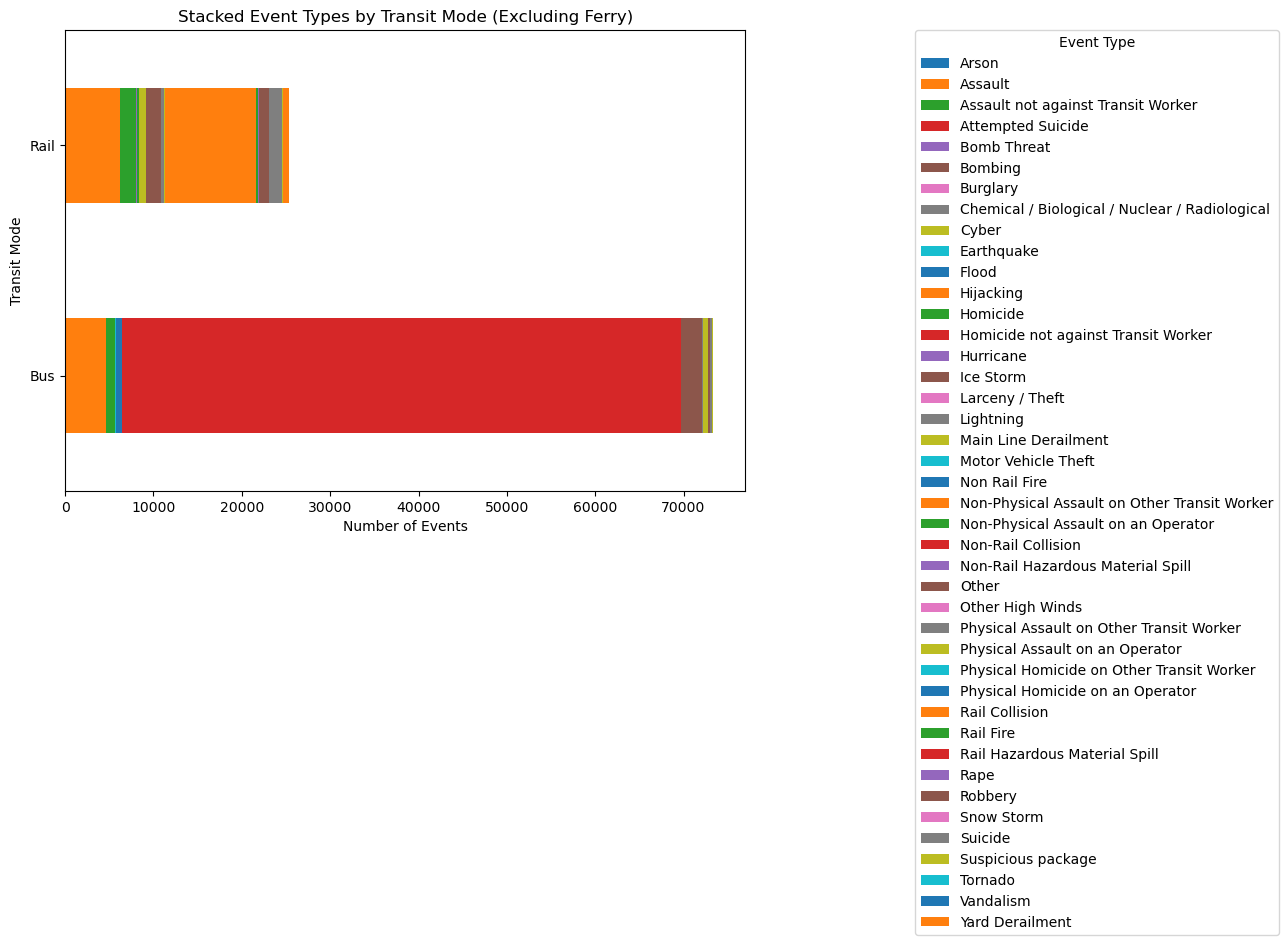

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# ... your data prep steps here ...
# Filter out rows where the transit mode is 'Ferry'
df_filtered = df[df['Rail/Bus/Ferry'] != 'Ferry']

# Group by transit mode and event type, counting the number of events
mode_event = df_filtered.groupby(['Rail/Bus/Ferry', 'Event Type']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(14, 8))  # Increase figure size
mode_event.plot(
    kind='barh',
    stacked=True,
    ax=ax
)

ax.set_xlabel('Number of Events')
ax.set_ylabel('Transit Mode')
ax.set_title('Stacked Event Types by Transit Mode (Excluding Ferry)')

# Move legend outside to the right
plt.legend(
    title='Event Type',
    bbox_to_anchor=(1.25, 1),  # Adjust as needed (further right/higher/lower)
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()


In [6]:
# prompt: print the most frequent uniques for the column transit vehicle action

# Assuming 'df' is your DataFrame and the column name is 'transit_vehicle_action'
# If the column name is different, replace it accordingly.  
# The code is case sensitive, make sure to use the correct case.

if 'Transit Vehicle Action' in df.columns:
    top_actions = df['Transit Vehicle Action'].value_counts().nlargest(10) # Get the top 10 most frequent actions. Adjust the number as needed.
    print(top_actions)
else:
    print("The column 'Transit Vehicle Action' does not exist in the DataFrame.")

Going Straight                 42761
Stopped                        15162
Making a left turn              4116
Making a stop                   2974
Leaving a stop                  2795
Making a right turn             1846
Changing lanes                  1325
Making a turn                   1187
Negotiating a curve             1115
Proceeding through a switch      835
Name: Transit Vehicle Action, dtype: int64


In [9]:
# print the most frequent uniques for the column other transit vehicle action

# Assuming 'df' is your DataFrame and the column name is 'other_transit_vehicle_action'
# If the column name is different, replace it accordingly.
# The code is case sensitive, make sure to use the correct case.

if 'Other Transit Vehicle Action Description' in df.columns:
    top_other_actions = df['Other Transit Vehicle Action Description'].value_counts().nlargest(10) # Get the top 10 most frequent actions. Adjust the number as needed.
    print(top_other_actions)
else:
    print("The column 'Other Transit Vehicle Action' does not exist in the DataFrame.")
    

Side Impact               22935
Other front impact        16924
Rear-ended                13999
Head-On                    8552
Sideswipe                  4161
Rear-ending                4156
Other rear impact          2695
Rear-ending,Rear-ended      163
Roof/top of vehicle         154
Rear-ended,Rear-ending      138
Name: Other Transit Vehicle Action Description, dtype: int64


Fixed Route Flag - Value Counts:
True     88792
False     9931
Name: Fixed Route Flag, dtype: int64


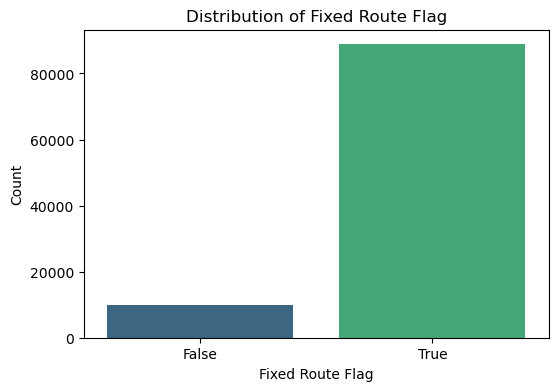

Cross Tabulation: Fixed Route Flag vs Event Type
Event Type        Arson  Assault  Assault not against Transit Worker  \
Fixed Route Flag                                                       
False                 0       25                                   4   
True                 25    10727                                2740   

Event Type        Attempted Suicide  Bomb Threat  Bombing  Burglary  \
Fixed Route Flag                                                      
False                             0            2        0         2   
True                              1          159        1        27   

Event Type        Chemical / Biological / Nuclear / Radiological  Cyber  \
Fixed Route Flag                                                          
False                                                          0      1   
True                                                          35      5   

Event Type        Earthquake  ...  Rail Fire  Rail Hazardous Material Spill 

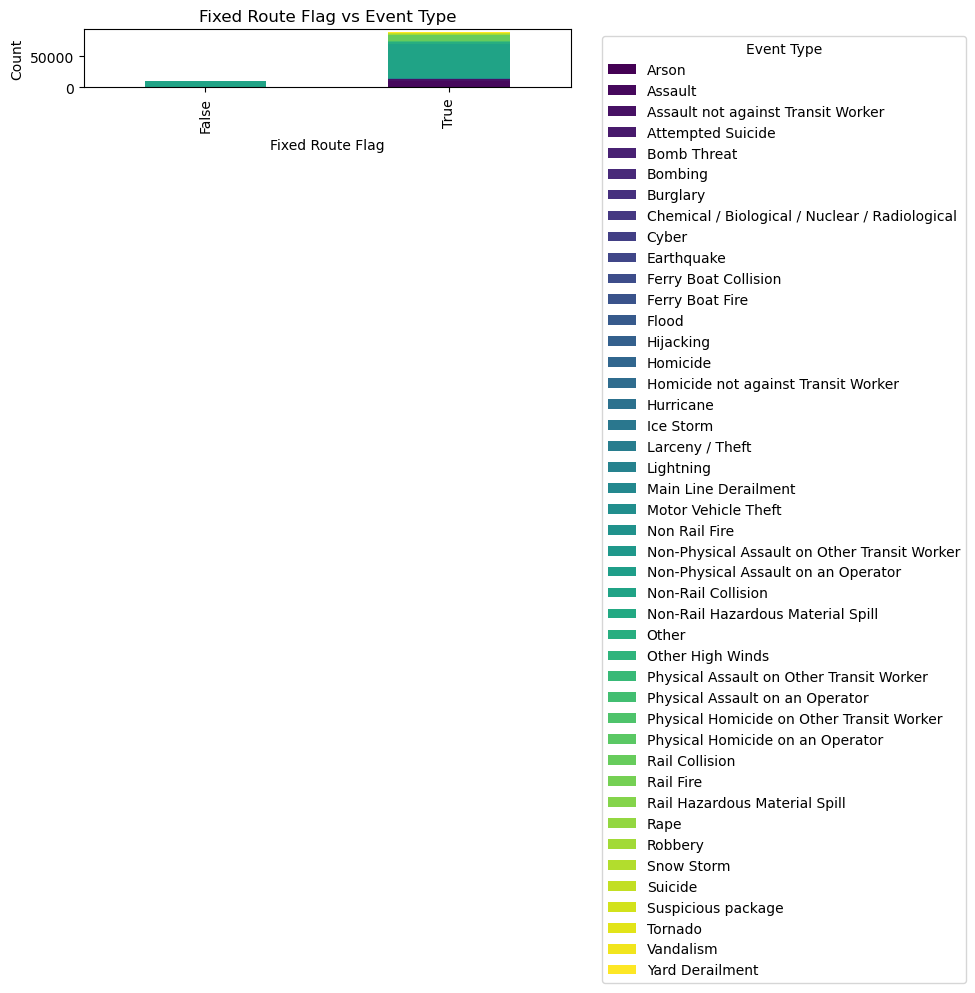

In [10]:
# 1. Explore the distribution of the 'Fixed Route Flag' column
fixed_route_counts = df['Fixed Route Flag'].value_counts(dropna=False)
print("Fixed Route Flag - Value Counts:")
print(fixed_route_counts)

# 2. Visualize the distribution using a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Fixed Route Flag', palette='viridis')
plt.title("Distribution of Fixed Route Flag")
plt.xlabel("Fixed Route Flag")
plt.ylabel("Count")
plt.show()

# 3. Explore relationship with another field (e.g., Event Type)
# Check if the 'Event Type' column exists
if 'Event Type' in df.columns:
    # Create a cross-tabulation between Fixed Route Flag and Event Type
    cross_tab = pd.crosstab(df['Fixed Route Flag'], df['Event Type'])
    print("Cross Tabulation: Fixed Route Flag vs Event Type")
    print(cross_tab)
    
    # Visualize the cross-tab as a stacked bar chart
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title("Fixed Route Flag vs Event Type")
    plt.xlabel("Fixed Route Flag")
    plt.ylabel("Count")
    plt.legend(title="Event Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [12]:
# Define the list of columns to keep
columns_to_keep = [
    'NTD ID',
    'Primary UZA UACE Code',
    'Rail/Bus/Ferry',
    'Mode Name',
    'Mode',
    'TOS',
    'Year',
    'Event Date',
    'Event Time',
    'Event Type',
    'Event Type Group',
    'Safety/Security',
    'Property Damage',
    'Total Injuries',
    'Total Fatalities',
    'Towed (Y/N)',
    'Number of Transit Vehicles Involved',
    'Number of Non-Transit Vehicles Involved',
    'Number of Cars on Involved Transit Vehicles',
    'Non-Transit Vehicle Type List',
    'Location Type',
    'Latitude',
    'Longitude',
    'Weather',
    'Lighting',
    'Road Configuration',
    'Path Condition',
    'Right of Way Condition',
    'Intersection Control Device',
    'Transit Vehicle Action',
    'Other Transit Vehicle Action Description',
    'Non-Transit Vehicle Action List',
    'Transit (Y/N)',
    'Fuel Type',
    'Vehicle Speed',
    'Transit Vehicle Type',
    'Non-Transit Vehicle Type',
    'Transit Vehicle Manufacturer',
    'Total Serious Injuries'
]


# Create a smaller dataset with only the desired columns
df_small = df[columns_to_keep]

# Optionally, display the first few rows to verify
print(df_small.head())

   NTD ID  Primary UZA UACE Code Rail/Bus/Ferry        Mode Name Mode TOS  \
0   20080                  63217            Bus              Bus   MB  DO   
1   40035                  65863            Bus  Demand Response   DR  DO   
2   50027                  57628           Rail       Light Rail   LR  DO   
3   90026                  78661           Rail       Light Rail   LR  DO   
4   20080                  63217            Bus              Bus   MB  DO   

   Year        Event Date  Event Time                           Event Type  \
0  2024  2024 November 30  8:46:00 AM                   Non-Rail Collision   
1  2024  2024 November 30  7:09:00 PM                   Non-Rail Collision   
2  2024  2024 November 29  8:30:00 PM  Homicide not against Transit Worker   
3  2024  2024 November 29  1:03:00 PM   Assault not against Transit Worker   
4  2024  2024 November 27  3:20:00 PM                   Non-Rail Collision   

   ... Transit Vehicle Action Other Transit Vehicle Action Descripti

                Total Injuries  Total Fatalities  Total Serious Injuries
Rail/Bus/Ferry                                                          
Bus                      91926              1169                       0
Ferry                       79                 5                       0
Rail                     17142              1951                    2381


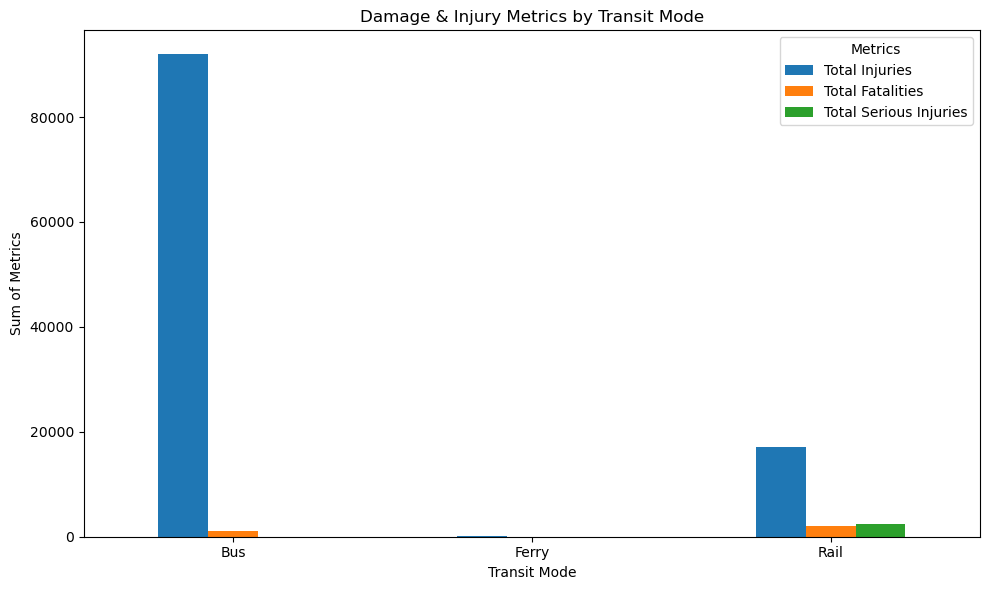

In [13]:
df = df_small

# Ensure column names are standardized (e.g., stripping extra whitespace)
df.columns = df.columns.str.strip()

# Grouping example: Damage & Injury Metrics by Transit Mode
# (Transit & Mode Information: 'Rail/Bus/Ferry' & Damage Metrics: 'Total Injuries', 'Total Fatalities', 'Total Serious Injuries')

# Aggregate summary statistics per transit mode
damage_summary = df.groupby('Rail/Bus/Ferry')[['Total Injuries', 'Total Fatalities', 'Total Serious Injuries']].sum()

print(damage_summary)

# Plotting the aggregated damage metrics by transit mode
damage_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Damage & Injury Metrics by Transit Mode')
plt.xlabel('Transit Mode')
plt.ylabel('Sum of Metrics')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


In [14]:
# Convert 'Event Date' to datetime
df['Event Date'] = pd.to_datetime(df['Event Date'], errors='coerce')

# Convert 'Event Time' to a proper time format if required (if stored as string, you might parse or extract hour)
# For example, if 'Event Time' is in HH:MM:SS format:
df['Event Time'] = pd.to_datetime(df['Event Time'], format='%H:%M:%S', errors='coerce').dt.time

# Extract additional temporal components for analysis (e.g., year, month, weekday)
df['Year'] = df['Event Date'].dt.year
df['Month'] = df['Event Date'].dt.month
df['Weekday'] = df['Event Date'].dt.day_name()

# Check the first few rows to verify transformations
print(df[['NTD ID', 'Event Date', 'Year', 'Month', 'Weekday']].head())


   NTD ID Event Date  Year  Month    Weekday
0   20080 2024-11-30  2024     11   Saturday
1   40035 2024-11-30  2024     11   Saturday
2   50027 2024-11-29  2024     11     Friday
3   90026 2024-11-29  2024     11     Friday
4   20080 2024-11-27  2024     11  Wednesday


In [15]:
df.head(10)

,NTD ID,Primary UZA UACE Code,Rail/Bus/Ferry,Mode Name,Mode,TOS,Year,Event Date,Event Time,Event Type,...,Non-Transit Vehicle Action List,Transit (Y/N),Fuel Type,Vehicle Speed,Transit Vehicle Type,Non-Transit Vehicle Type,Transit Vehicle Manufacturer,Total Serious Injuries,Month,Weekday
0,20080,63217,Bus,Bus,MB,DO,2024,2024-11-30,NaT,Non-Rail Collision,...,Going straight,"N,Y",Diesel,0.0,Transit: bus - articulated,Automobile,New Flyer of America,0,11,Saturday
1,40035,65863,Bus,Demand Response,DR,DO,2024,2024-11-30,NaT,Non-Rail Collision,...,Going straight,"N,Y",Gasoline,10.0,Transit: bus - cutaway,Automobile,Ford Motor Corporation,0,11,Saturday
2,50027,57628,Rail,Light Rail,LR,DO,2024,2024-11-29,NaT,Homicide not against Transit Worker,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11,Friday
3,90026,78661,Rail,Light Rail,LR,DO,2024,2024-11-29,NaT,Assault not against Transit Worker,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11,Friday
4,20080,63217,Bus,Bus,MB,DO,2024,2024-11-27,NaT,Non-Rail Collision,...,Going backwards,"N,Y",Diesel,15.0,Transit: bus,Automobile,North American Bus Industries Inc. (form. Ikar...,0,11,Wednesday
5,40034,56602,Rail,Monorail/Automated Guideway,MG,DO,2024,2024-11-27,NaT,Assault not against Transit Worker,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11,Wednesday
6,20008,63217,Rail,Heavy Rail,HR,DO,2024,2024-11-27,NaT,Physical Assault on Other Transit Worker,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11,Wednesday
7,20008,63217,Bus,Bus,MB,DO,2024,2024-11-26,NaT,Physical Assault on an Operator,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11,Tuesday
8,30006,74746,Bus,Bus,MB,DO,2024,2024-11-25,NaT,Non-Rail Collision,...,Going straight,"N,Y",Compressed natural gas,0.0,Transit: bus,Automobile,Gillig Corporation,0,11,Monday
9,1,80389,Bus,Bus,MB,DO,2024,2024-11-25,NaT,Non Rail Fire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11,Monday


In [16]:
# get rows with column 'rail/bus/ferry' equal to 'bus'
df_bus = df[df['Rail/Bus/Ferry'] == 'Bus']

In [17]:
df_bus.head(10)

,NTD ID,Primary UZA UACE Code,Rail/Bus/Ferry,Mode Name,Mode,TOS,Year,Event Date,Event Time,Event Type,...,Non-Transit Vehicle Action List,Transit (Y/N),Fuel Type,Vehicle Speed,Transit Vehicle Type,Non-Transit Vehicle Type,Transit Vehicle Manufacturer,Total Serious Injuries,Month,Weekday
0,20080,63217,Bus,Bus,MB,DO,2024,2024-11-30,NaT,Non-Rail Collision,...,Going straight,"N,Y",Diesel,0.0,Transit: bus - articulated,Automobile,New Flyer of America,0,11,Saturday
1,40035,65863,Bus,Demand Response,DR,DO,2024,2024-11-30,NaT,Non-Rail Collision,...,Going straight,"N,Y",Gasoline,10.0,Transit: bus - cutaway,Automobile,Ford Motor Corporation,0,11,Saturday
4,20080,63217,Bus,Bus,MB,DO,2024,2024-11-27,NaT,Non-Rail Collision,...,Going backwards,"N,Y",Diesel,15.0,Transit: bus,Automobile,North American Bus Industries Inc. (form. Ikar...,0,11,Wednesday
7,20008,63217,Bus,Bus,MB,DO,2024,2024-11-26,NaT,Physical Assault on an Operator,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11,Tuesday
8,30006,74746,Bus,Bus,MB,DO,2024,2024-11-25,NaT,Non-Rail Collision,...,Going straight,"N,Y",Compressed natural gas,0.0,Transit: bus,Automobile,Gillig Corporation,0,11,Monday
9,1,80389,Bus,Bus,MB,DO,2024,2024-11-25,NaT,Non Rail Fire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11,Monday
10,60056,22042,Bus,Bus,MB,DO,2024,2024-11-24,NaT,Assault not against Transit Worker,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11,Sunday
11,1,80389,Bus,Bus,MB,DO,2024,2024-11-23,NaT,Non-Rail Collision,...,Going straight,"N,Y",Hybrid Diesel,20.0,Transit: bus - articulated,Automobile,New Flyer of America,0,11,Saturday
12,30030,92242,Bus,Bus,MB,DO,2024,2024-11-22,NaT,Assault not against Transit Worker,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11,Friday
15,20080,63217,Bus,Bus,MB,DO,2024,2024-11-21,NaT,Non-Rail Collision,...,Parked,"Y,N",Diesel,20.0,Transit: bus,Other,North American Bus Industries Inc. (form. Ikar...,0,11,Thursday


In [18]:
#rank the top 10 injuries by transit vehicle type
top_injuries = df.groupby('Transit Vehicle Type')['Total Injuries'].sum().nlargest(10)
print(top_injuries)

Transit Vehicle Type
Transit: bus                        61940
Transit: bus - articulated           6440
Rail Vehicle                         3180
Transit: bus - cutaway               3021
Transit demand response vehicle      2679
Transit: demand response vehicle     2670
Transit: over-the-road bus/coach     1976
Light Rail Vehicle                   1141
Heavy Rail Passenger Car              867
Transit: bus,Transit: bus             834
Name: Total Injuries, dtype: int64


In [20]:
# rank the top 10 fatalities by Transit Vehicle Action
top_fatalities = df.groupby('Transit Vehicle Action')['Total Fatalities'].sum().nlargest(10)
print(top_fatalities)


Transit Vehicle Action
Going Straight         1296
Making a stop           519
Leaving a stop          143
Stopped                 140
Making a left turn      129
Making a right turn      51
Making a turn            45
Negotiating a curve      25
Changing lanes           10
Parked                   10
Name: Total Fatalities, dtype: int64


In [22]:
# list the columns name in df
df.columns

Index(['NTD ID', 'Primary UZA UACE Code', 'Rail/Bus/Ferry', 'Mode Name',
       'Mode', 'TOS', 'Year', 'Event Date', 'Event Time', 'Event Type',
       'Event Type Group', 'Safety/Security', 'Property Damage',
       'Total Injuries', 'Total Fatalities', 'Towed (Y/N)',
       'Number of Transit Vehicles Involved',
       'Number of Non-Transit Vehicles Involved',
       'Number of Cars on Involved Transit Vehicles',
       'Non-Transit Vehicle Type List', 'Location Type', 'Latitude',
       'Longitude', 'Weather', 'Lighting', 'Road Configuration',
       'Path Condition', 'Right of Way Condition',
       'Intersection Control Device', 'Transit Vehicle Action',
       'Other Transit Vehicle Action Description',
       'Non-Transit Vehicle Action List', 'Transit (Y/N)', 'Fuel Type',
       'Vehicle Speed', 'Transit Vehicle Type', 'Non-Transit Vehicle Type',
       'Transit Vehicle Manufacturer', 'Total Serious Injuries', 'Month',
       'Weekday'],
      dtype='object')

In [25]:
# show list of unique values in the column event time
df['Event Time'].unique()

array(['NaT'], dtype='datetime64[ns]')

In [ ]:
# Convert "Event Date" to datetime
df['Event Date'] = pd.to_datetime(df['Event Date'], errors='coerce')

# Convert "Event Time" to time objects (assuming format like "HH:MM AM/PM")
df['Event Time'] = pd.to_datetime(df['Event Time'], format='%I:%M %p', errors='coerce').dt.time

# Combine "Event Date" and "Event Time" into a single datetime column
def combine_date_time(row):
    if pd.notnull(row['Event Date']) and pd.notnull(row['Event Time']):
        return datetime.combine(row['Event Date'], row['Event Time'])
    return pd.NaT

df['Event DateTime'] = df.apply(combine_date_time, axis=1)

# Define the 10 key columns based on their informational value
selected_cols = [
    'Event DateTime',                     # Temporal context
    'Event Type',                         # Type of event
    'Safety/Security',                    # Safety vs. security concern
    'Property Damage',                    # Economic impact
    'Total Injuries',                     # Human impact (injuries)
    'Total Fatalities',                   # Human impact (fatalities)
    'Number of Transit Vehicles Involved',# Scale of transit vehicle involvement
    'Number of Non-Transit Vehicles Involved', # Scale of non-transit vehicle involvement
    'Weather',                            # Environmental context
    'Road Configuration'                  # Infrastructure context
]

# Create a new dataframe with only the selected columns
df_subset = df[selected_cols]

# Check missing value counts for each column
missing_counts = df_subset.isnull().sum()
print("Missing Values per Column:\n", missing_counts)

# Optionally, show a summary of the subset
print("\nData Summary:")
print(df_subset.describe(include='all'))

# Save the subset for further analysis if needed
df_subset.to_csv("major_safety_events_subset.csv", index=False)

print("\nSubset saved as 'major_safety_events_subset.csv'")

In [32]:
# Load the dataset
data_path = "../data/raw_data.csv"
df_full = pd.read_csv(data_path)

# find unique values in each column, count the number of unique values and display the top 3 unique values for each column
# store it in a df_unique dataframe
unique_values = []
unique_counts = []
top_values = []
selected_cols = [
    'Event Type',                         # Type of event
    'Safety/Security',                    # Safety vs. security concern
    'Property Damage',                    # Economic impact
    'Total Injuries',                     # Human impact (injuries)
    'Total Fatalities',                   # Human impact (fatalities)
    'Number of Transit Vehicles Involved',# Scale of transit vehicle involvement
    'Number of Non-Transit Vehicles Involved', # Scale of non-transit vehicle involvement
    'Weather',                            # Environmental context
    'Road Configuration'                  # Infrastructure context
]


for col in df_full.columns:
    unique_vals = df_full[col].unique()
    unique_values.append(unique_vals)
    unique_counts.append(len(unique_vals))
    top_values.append(unique_vals[:3])
    
df_unique = pd.DataFrame({
    'Column': df_full.columns,
    'Unique Values': unique_values,
    'Unique Count': unique_counts,
    'Top Values': top_values
})

# Display the dataframe with unique value information that is within the selected col
df_unique_selected = df_unique[df_unique['Column'].isin(selected_cols)]
print(df_unique_selected)




/var/folders/7x/7pg3n5tn5q5ft7q0swv1v7_h0000gn/T/ipykernel_65106/2129272221.py:3: DtypeWarning: Columns (18,20,24,34,38,45,46,49,53,54,60,63,64,69,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv(data_path)


             Column                                      Unique Values  \
23  Property Damage  [5300.0, 40000.0, nan, 5700.0, 0.0, 4500.0, 41...   
25   Total Injuries  [0, 2, 1, 3, 10, 6, 4, 7, 5, 9, 8, 11, 16, 23,...   

    Unique Count              Top Values  
23          8184  [5300.0, 40000.0, nan]  
25            39               [0, 2, 1]  


In [33]:
selected_cols = [
    'Event Type',                         # Type of event
    'Safety/Security',                    # Safety vs. security concern
    'Property Damage',                    # Economic impact
    'Total Injuries',                     # Human impact (injuries)
    'Total Fatalities',                   # Human impact (fatalities)
    'Number of Transit Vehicles Involved',# Scale of transit vehicle involvement
    'Number of Non-Transit Vehicles Involved', # Scale of non-transit vehicle involvement
    'Weather',                            # Environmental context
    'Road Configuration'                  # Infrastructure context
]

In [34]:
# Display the dataframe with unique value information that is within the selected col
df_unique_selected = df_unique[df_unique['Column'].isin(selected_cols)]
print(df_unique_selected)

                                     Column  \
13                               Event Type   
21                          Safety/Security   
23                          Property Damage   
25                           Total Injuries   
26                         Total Fatalities   
28      Number of Transit Vehicles Involved   
29  Number of Non-Transit Vehicles Involved   
50                                  Weather   
55                       Road Configuration   

                                        Unique Values  Unique Count  \
13  [Non-Rail Collision, Homicide not against Tran...            44   
21                                         [SFT, SEC]             2   
23  [5300.0, 40000.0, nan, 5700.0, 0.0, 4500.0, 41...          8184   
25  [0, 2, 1, 3, 10, 6, 4, 7, 5, 9, 8, 11, 16, 23,...            39   
26                          [0, 1, 3, 4, 2, 10, 5, 6]             8   
28                                    [1, 0, 2, 3, 4]             5   
29  [1, 0, 2, 4, 3, 7, 5, 6, 9, 